In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# dims: 要计算的通道数，对于灰度图dims=1，普通彩色图dims=3
# range: 要计算的像素值范围，一般为[0,256)
# bins: 子区段数目，如果我们统计0~255每个像素值，bins=256；如果划分区间，比如0~15, 16~31…240~255这样16个区间，bins=16

0.001159811


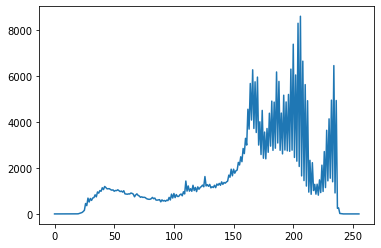

In [21]:
# opencv 计算直方图
img = cv2.imread('image.jpg', 0)
# 参数1：要计算的原图，以方括号的传入，如：[img]
# 参数2：类似前面提到的dims，灰度图写[0]就行，彩色图B/G/R分别传入[0]/[1]/[2]
# 参数3：要计算的区域，计算整幅图的话，写None
# 参数4：前面提到的bins
# 参数5：前面提到的range
start = cv2.getTickCount()
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
end = cv2.getTickCount()
print((end - start) / cv2.getTickFrequency())
plt.plot(hist)
plt.show()

0.015161001


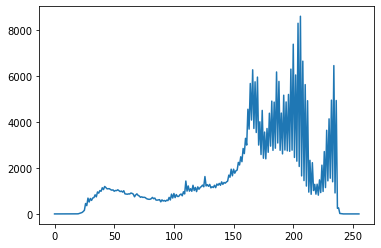

In [22]:
# Numpy计算直方图
start = cv2.getTickCount()
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
end = cv2.getTickCount()
print((end - start) / cv2.getTickFrequency())
plt.plot(hist)
plt.show()

0.006316033


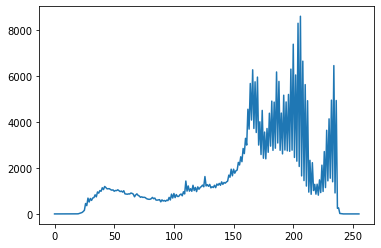

In [23]:
# Numpy计算直方图
start = cv2.getTickCount()
hist = np.bincount(img.ravel(), minlength=256)
end = cv2.getTickCount()
print((end - start) / cv2.getTickFrequency())
plt.plot(hist)
plt.show()

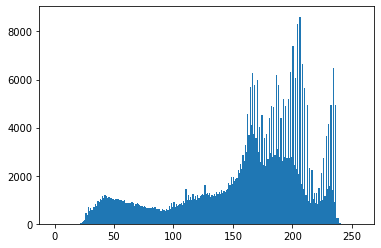

In [24]:
# 绘制直方图
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

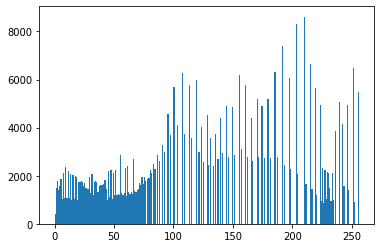

In [28]:
# 直方图均衡化
# 一副效果好的图像通常在直方图上的分布比较均匀，直方图均衡化就是用来改善图像的全局亮度和对比度。
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(), 256, [0, 256])
plt.show()

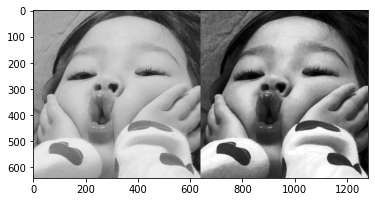

In [32]:
plt.imshow(np.hstack((img, equ)), 'gray')
plt.show()

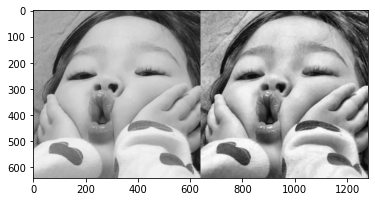

In [33]:
# 自适应均衡化
# 对比度受限的自适应直方图均衡化
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)
plt.imshow(np.hstack((img, cl1)), 'gray')
plt.show()